# **MedCost - Tech Challenge**
Desenvolvimento de um modelo de **Machine Learning** capaz de prever os custos médicos individuais cobrados pelo seguro de saúde.

# **Importação das bibliotecas**


In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



---



# **Leitura dos dados**

**Escolha dos dados:** Para cada cenário, uma lógica diferente. Os dados presentes na base, não podem ser totalmente aleatórios... Devem apresentar um lógica de acordo com o contexto que está sendo abordado.

**Por ex:** Nesse contexto, em que está se analisando os custos médicos de um indivíduo... Caso esse indivíduo tenha 3 filhos, seja fumante, e tenha um imc desregulado, o custo médico dele vai ser maior do que uma pessoa que tem 1 filho, não fuma e tem um imc regulado.

- `Idade`: Geralmente quanto maior a idade maior o custo de médico
- `IMC`: 18,5 à 24,9 = Normal | 25,0 à 29,9	= Sobrepeso | 30,0 à 39,9	= Obesidade | Maior que 40,0 = Obesidade Grave
- `Filhos`: Geralmente quanto mais filhos, maior o custo médico
- `Fumante`: Se fuma, o custo tende a ser maior, se não fuma tende a ser menor

In [70]:
# Lendo os Dadaos
df = pd.read_csv('amostra.csv')
display(df.head())

,idade,imc,filhos,genero,regiao,fumante,encargos
0,62,31.23,4,feminino,Sul,sim,4481.26
1,18,26.16,3,masculino,Leste,não,2023.88
2,21,27.60,3,masculino,Oeste,não,1650.01
3,21,36.95,0,masculino,Oeste,sim,2828.47
4,57,34.64,3,feminino,Leste,sim,4748.67


In [40]:
# Verificando valores nulos nas colunas
df.isnull().sum()

idade       0
imc         0
filhos      0
genero      0
regiao      0
fumante     0
encargos    0
dtype: int64

In [41]:
# Verificando Valores Duplicados
print(f'Número de linhas duplicadas: {df.duplicated().sum()}')

Número de linhas duplicadas: 0


In [42]:
# Excluindo valores duplicados
df = df.drop_duplicates()



---



# **Análise exploratória dos dados**
- Exploração visual dos dados para entender relação entre variáveis
- Identificação de Insights por meio da visualização dos dados
- Uso de gráficos de dispersão para visualizar relações entre variáveis

In [ ]:
# Linhas x Colunas
df.shape

(3000, 7)

In [ ]:
# Dimensão da base de dados - qtde de dados, tipos de dados de cada coluna, se existem dados nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   idade     3000 non-null   int64  
 1   imc       3000 non-null   float64
 2   filhos    3000 non-null   int64  
 3   genero    3000 non-null   object 
 4   regiao    3000 non-null   object 
 5   fumante   3000 non-null   object 
 6   encargos  3000 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 164.2+ KB


In [ ]:
# Análise dos dados de tipo numérico - Função Pandas
display(df.describe())

,idade,imc,filhos,encargos
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,40.909333,30.004573,1.962000,2841.294830
std,13.494288,4.888211,1.404474,1223.658494
min,18.000000,14.120000,0.000000,-232.490000
25%,29.000000,26.797500,1.000000,1808.405000
50%,41.000000,30.090000,2.000000,2853.255000
75%,53.000000,33.260000,3.000000,3836.882500
max,64.000000,45.810000,4.000000,5943.580000


array([[<Axes: title={'center': 'idade'}>,
        <Axes: title={'center': 'imc'}>],
       [<Axes: title={'center': 'filhos'}>,
        <Axes: title={'center': 'encargos'}>]], dtype=object)

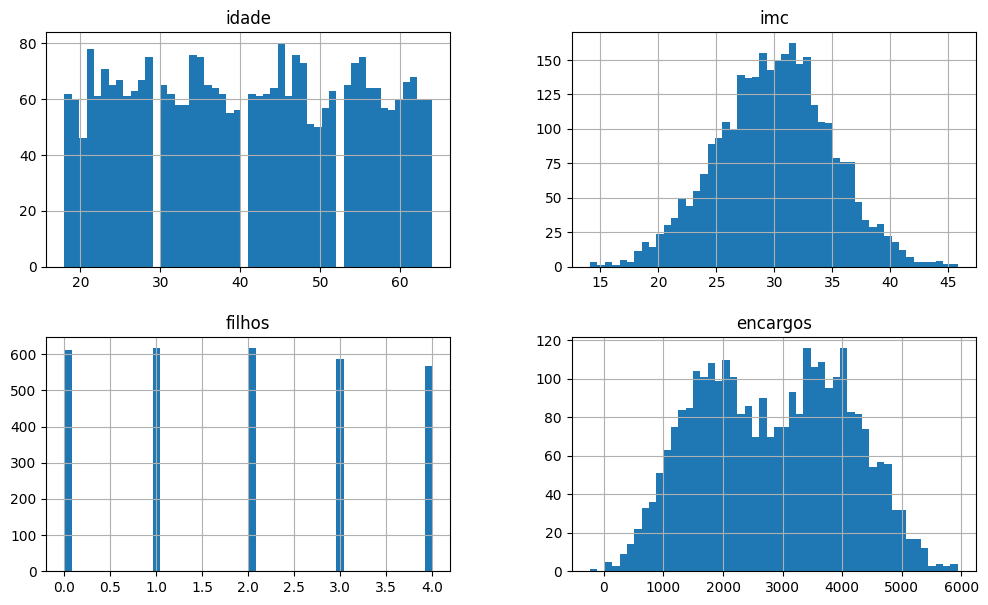

In [ ]:
# Análise visual - Histogramas para análise da distribuição dos dados

%matplotlib inline
display(df.hist(bins=50, figsize=(12,7)))


### Análises de Dispersão

Com essas análises, é possível ver a relação de algumas variáveis numéricas com a variável a ser prevista. Ver como está o acompanhamento das variáveis independentes para com a variável dependente.

É possível notar que com o aumento da idade, imc e quantidade de filhos, o custo médico também aumenta.

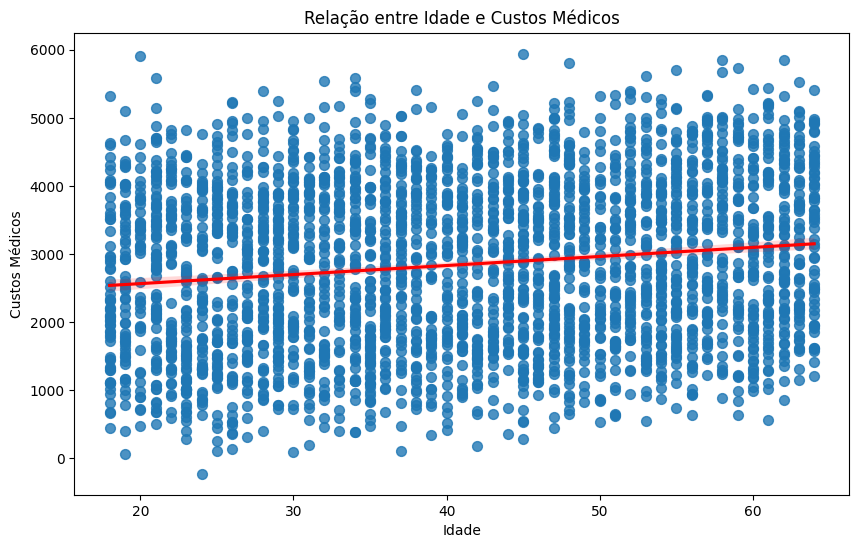

In [ ]:
# Análise de dispersão dos dados - Idade e Encargos
plt.figure(figsize=(10, 6))
sns.regplot(x='idade', y='encargos', data=df, scatter_kws={'s':50}, line_kws={'color':'red'})
plt.title('Relação entre Idade e Custos Médicos')
plt.xlabel('Idade')
plt.ylabel('Custos Médicos')
plt.show()

In [ ]:
# Idade Mínima | Idade Máxima | Média das Idades
print(f"Idade mínima Idade: {df['idade'].min()}")
print(f"Idade máxima Idade: {df['idade'].max()}")
print(f"Idade média Idade: {df['idade'].mean():.2f}")

Idade mínima Idade: 18
Idade máxima Idade: 64
Idade média Idade: 40.91


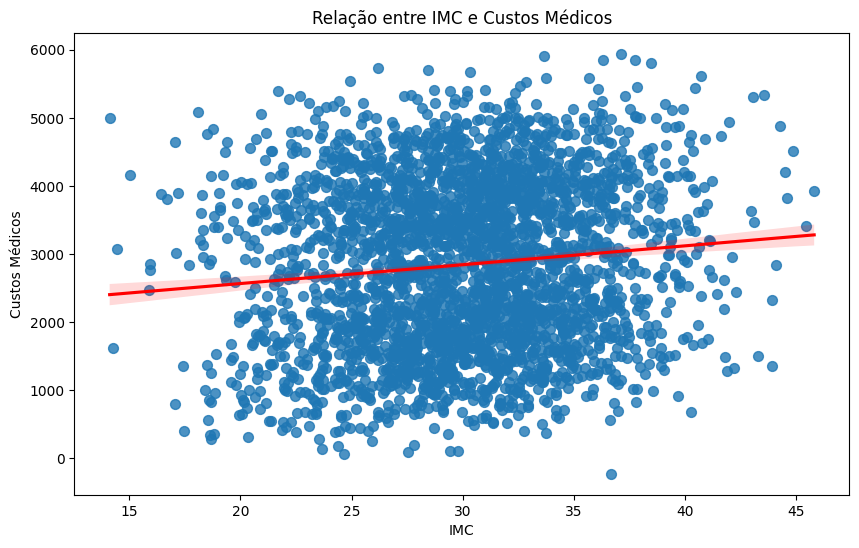

In [ ]:
# Análise de dispersão dos dados - IMC e Encargos
plt.figure(figsize=(10, 6))
sns.regplot(x='imc', y='encargos', data=df, scatter_kws={'s':50}, line_kws={'color':'red'})
plt.title('Relação entre IMC e Custos Médicos')
plt.xlabel('IMC')
plt.ylabel('Custos Médicos')
plt.show()

In [20]:
# IMC Mínimo | IMC Máximo | Média de IMC
print(f"Valores mínimos IMC: {df['imc'].min()}")
print(f"Valores máximos IMC: {df['imc'].max():.2f}")
print(f"Valores médios IMC: {df['imc'].mean():.2f}")

Valores mínimos IMC: 14.12
Valores máximos IMC: 45.81
Valores médios IMC: 30.00


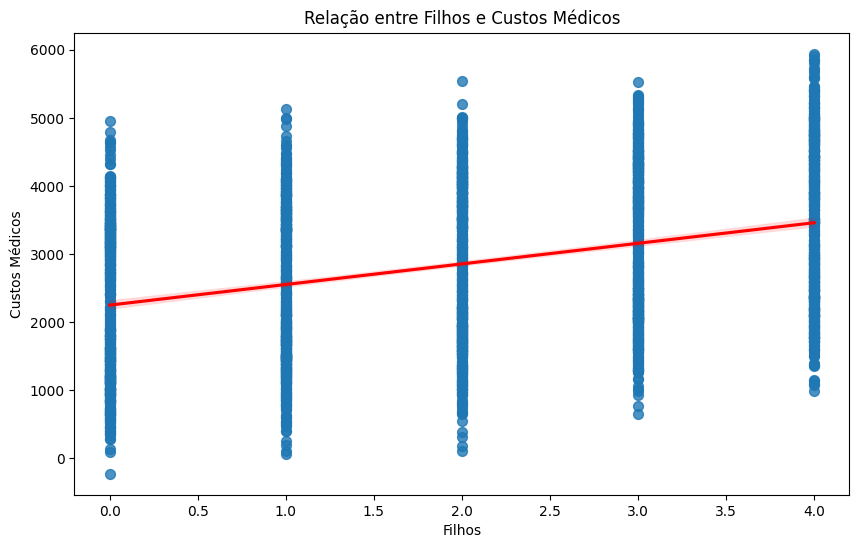

In [ ]:
# Análise de dispersão dos dados - Filhos e Encargos
plt.figure(figsize=(10, 6))
sns.regplot(x='filhos', y='encargos', data=df, scatter_kws={'s':50}, line_kws={'color':'red'})
plt.title('Relação entre Filhos e Custos Médicos')
plt.xlabel('Filhos')
plt.ylabel('Custos Médicos')
plt.show()

In [22]:
# Quantidade Mínima de Filhos | Quantidade Máxima | Quantidade Média de Filhos
print(f"Valores mínimos Filhos: {df['filhos'].min()}")
print(f"Valores máximos Filhos: {df['filhos'].max():.2f}")
print(f"Valores médios Filhos: {df['filhos'].mean():.2f}")

Valores mínimos Filhos: 0
Valores máximos Filhos: 4.00
Valores médios Filhos: 1.96


### Análises em BoxPlots

Outra maneira de analisar a distribuição dos dados é com **Boxplots**. Com esses gráficos, é possível identificar a variação e distribuição dos, como também valores atípicos, como em IMC por exemplo.

Verificando existência de OutLiers na quantidade das Variáveis Numéricas

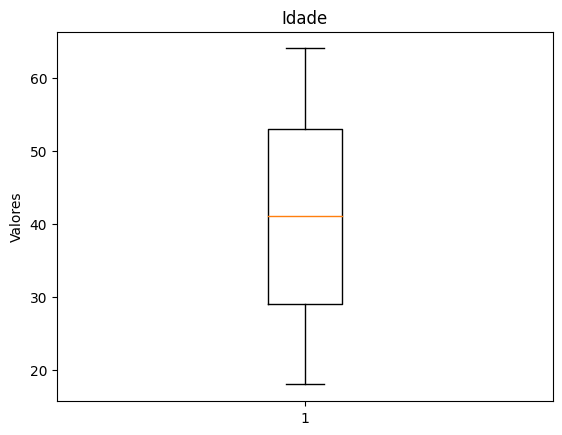

In [ ]:
# Boxplot de Idade
plt.boxplot(df['idade'])
plt.title('Idade')
plt.ylabel('Valores')
plt.show()

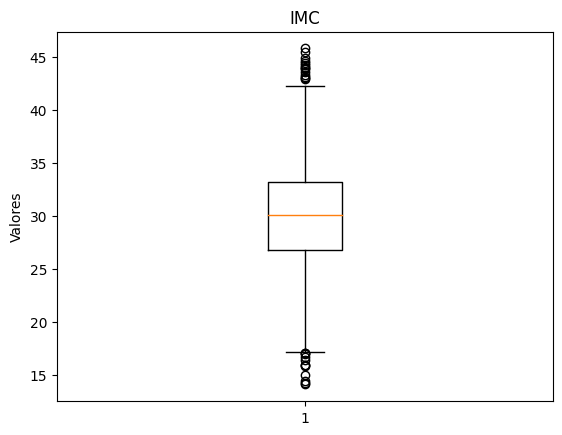

In [ ]:
# Boxplot de IMC
plt.boxplot(df['imc'])
plt.title('IMC')
plt.ylabel('Valores')
plt.show()

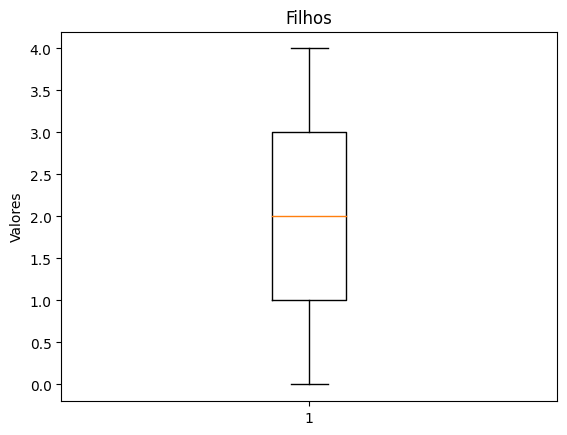

In [ ]:
# Boxplot de Filhos
plt.boxplot(df['filhos'])
plt.title('Filhos')
plt.ylabel('Valores')
plt.show()



---



# **Transformando dados Categóricos**

Aqui foram aplicadas as técnicas de **LabelEncoder** e **OneHotEncoder**.

### OneHotEncoder e LabelEncoder. Qual das duas técnicas? Uma só, ou será que as duas?

As colunas categóricas são: `genero`, `regiao`, `fumante`.

- `genero`: masculino | feminino.
- `regiao`: Leste | Norte | Oeste | Sul.
- `fumante`: sim | não.

**LabelEncoder**, transformará os dados em sequência numérica (0, 1, 2, 3, etc), que nesse caso, para as colunas `genero` e `regiao` não é aplicável. Em `genero` ficará 0 para masculino e 1 para feminino... Isso pode fazer com que na hora do modelo aprender, ele coloque um dos dados como melhor, ou um dos dados como verdadeiro e outro como falso. E o mesmo serve para `regiao`, colocará as regiões em uma ordem numérica hierárquica, e isso pode atrapalhar na aprendizagem do modelo.

Então o ideal para as colunas `genero` e `regiao` é aplicar **OneHotEncoder**, transformando cara variante de dado em uma nova coluna, com valor True ou False indicando se o indivíduo é ou não do sexo feminino, é ou não de tal região… E assim por diante.

Para a coluna `fumante`, o **LabelEncoder** supri a necessidade, pois o **sim** e **não**, já representam um certo e errado, fuma ou não fuma, que é o mesmo que True ou False.

In [71]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

# LabelEncoder para Fumante
le_fumante = LabelEncoder()
df['fumante'] = le_fumante.fit_transform(df['fumante'])

# OneHotEncoder para Genero e Região
ohe = OneHotEncoder()
encoded_features = ohe.fit_transform(df[['genero', 'regiao']]).toarray()

# Obtendo os nomes das colunas resultantes do One-Hot Encoding
encoded_columns = ohe.get_feature_names_out(['genero', 'regiao'])

# Criando um DataFrame com as colunas one-hot encoded
df_encoded = pd.DataFrame(encoded_features, columns=encoded_columns)

# Combinando os DataFrames
df_final = pd.concat([df, df_encoded], axis=1)
df_final.drop(columns=['genero', 'regiao'], inplace=True)  # Remover colunas originais

display(df_final.head())

,idade,imc,filhos,fumante,encargos,genero_feminino,genero_masculino,regiao_Leste,regiao_Norte,regiao_Oeste,regiao_Sul
0,62,31.23,4,1,4481.26,1.0,0.0,0.0,0.0,0.0,1.0
1,18,26.16,3,0,2023.88,0.0,1.0,1.0,0.0,0.0,0.0
2,21,27.60,3,0,1650.01,0.0,1.0,0.0,0.0,1.0,0.0
3,21,36.95,0,1,2828.47,0.0,1.0,0.0,0.0,1.0,0.0
4,57,34.64,3,1,4748.67,1.0,0.0,1.0,0.0,0.0,0.0


### Matriz de Correlação

Analisando correalção entre variáveis

In [72]:
import pandas as pd

# Calculando a matriz de correlação
corr_matriz = df_final.corr()

print(corr_matriz)

                     idade       imc    filhos   fumante  encargos  \
idade             1.000000  0.018829 -0.013465  0.004223  0.146757   
imc               0.018829  1.000000  0.020975  0.004462  0.110768   
filhos           -0.013465  0.020975  1.000000  0.012987  0.347600   
fumante           0.004223  0.004462  0.012987  1.000000  0.827226   
encargos          0.146757  0.110768  0.347600  0.827226  1.000000   
genero_feminino   0.010028 -0.003433 -0.004213  0.030498  0.024786   
genero_masculino -0.010028  0.003433  0.004213 -0.030498 -0.024786   
regiao_Leste     -0.006084 -0.022005 -0.005020 -0.022126 -0.013392   
regiao_Norte     -0.000892  0.011811  0.013639  0.012746  0.015417   
regiao_Oeste      0.039202  0.004602  0.000074  0.004769  0.006086   
regiao_Sul       -0.031631  0.005926 -0.008745  0.004939 -0.007956   

                  genero_feminino  genero_masculino  regiao_Leste  \
idade                    0.010028         -0.010028     -0.006084   
imc                  

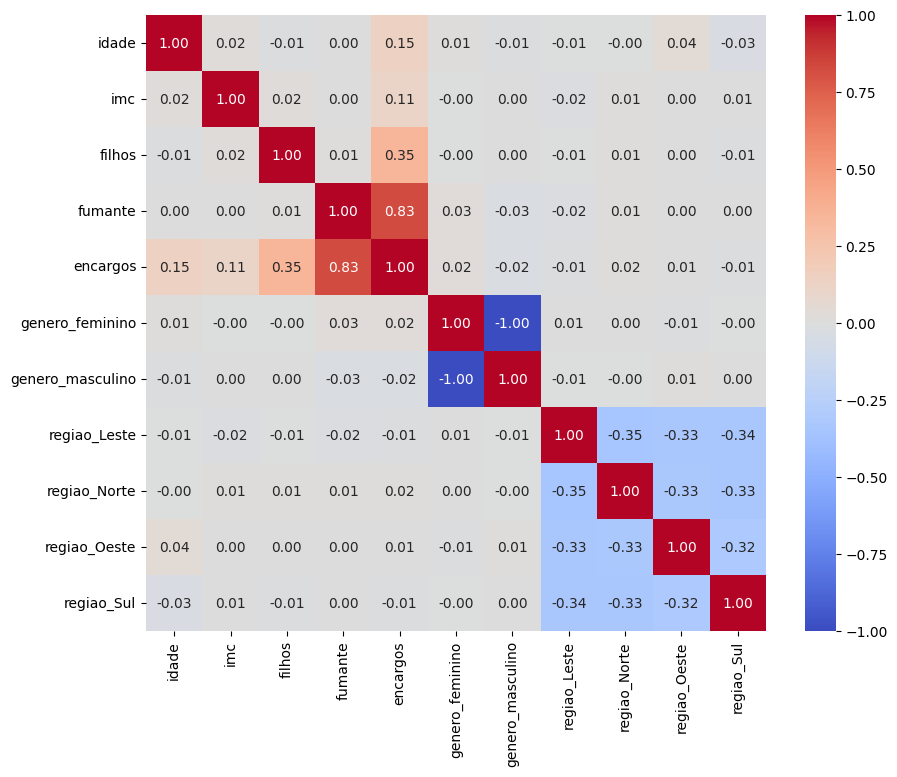

In [73]:
# Mapa de calor para visualizar melhor a correlação das variáveis

# Configurando o tamanho da figura
plt.figure(figsize=(10, 8))

# Criando o mapa de calor da matriz de correlação
sns.heatmap(corr_matriz, annot=True, cmap='coolwarm', fmt='.2f')

plt.show()

### Análisando as variáveis
- **Custos vs Idade**: Conforme a idade aumenta, os custos tendem a ser maiores.
- **Custos vs Fumante**: Fumantes tendem a ter custos maiores do que os que não fumam.
- **IMC vs Custos**: Conforme o IMC aumenta, os custos tendem a aumentar.

In [ ]:
# Verificando correlação das variáveis com Encargos
print("Correlação com o alvo (Encargos):")
print(df_final.corr()['encargos'])



---



# **Pré-processamento dos Dados**
- Separação das features e do target
- Divisão dos dados em conjuntos de treino e teste
- Padronização dos dados

In [76]:
from sklearn.model_selection import train_test_split

# Separação das Features e do Target
X = df_final.drop(columns=['encargos'], axis=1) # Variáveis características/independetes
y = df_final['encargos'] # Target/Variável dependente

# Divisão dos dados em conjuntos de Teste e Treino
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



---



# **Testes de Modelos sem Normalização/Padronização aplicada**

### Random Forest Regressor

In [ ]:
# Criando o modelo
model_final = RandomForestRegressor(n_estimators=100, random_state=42)

# Treinando o modelo
model_final.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred = model_final.predict(X_test)

In [ ]:
# Avaliando o modelo
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Squared Error: 324942.69
Root Mean Squared Error: 570.04
Mean Absolute Error: 448.69
R^2 Score: 0.79


### Gradient Boosting Regressor
Desempenho melhor do que o `Random Forest Regressor`

In [ ]:
# Criando o modelo
model_final = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Treinando o modelo
model_final.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred = model_final.predict(X_test)

In [ ]:
# Avaliando o modelo
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Squared Error: 284670.63
Root Mean Squared Error: 533.55
Mean Absolute Error: 415.69
R^2 Score: 0.82


### Linear Regression
Melhor desempenho

In [ ]:
# Criando o modelo
model_final = LinearRegression()

# Treinando o modelo
model_final.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred = model_final.predict(X_test)

In [ ]:
# Avaliando o modelo
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Squared Error: 282378.62
Root Mean Squared Error: 531.39
Mean Absolute Error: 411.91
R^2 Score: 0.82




---



# **Testes com Padronização aplicada**

### Padronizando os dados

In [77]:
scaler = StandardScaler()

scaler.fit(X_train) # Treinando o modelo

x_train_std_scaled = scaler.fit_transform(X_train)
x_test_std_scaled = scaler.transform(X_test)

In [78]:
x_train_std_scaled

array([[-0.81912428,  0.25777281, -1.39128671, ..., -0.58184084,
         1.78563201, -0.57414274],
       [-0.37577192,  0.5826436 ,  1.44867766, ..., -0.58184084,
         1.78563201, -0.57414274],
       [-0.30187986,  0.80470717,  0.02869547, ..., -0.58184084,
        -0.5600258 ,  1.74172714],
       ...,
       [-0.08020367,  0.08505669,  1.44867766, ..., -0.58184084,
         1.78563201, -0.57414274],
       [ 1.17596136,  0.27216582, -0.68129562, ...,  1.71868307,
        -0.5600258 , -0.57414274],
       [ 1.1020693 , -1.91351551,  0.02869547, ..., -0.58184084,
        -0.5600258 , -0.57414274]])

### Random Forest Regressor

In [47]:
model_std = RandomForestRegressor(n_estimators=100, random_state=42)

# Treinando o modelo
model_std.fit(x_train_std_scaled, y_train)

# Fazendo previsões no conjunto de teste
y_pred_std = model_std.predict(x_test_std_scaled)

# Avaliando o modelo
mse_std = mean_squared_error(y_test, y_pred_std)
rmse_std = np.sqrt(mse_std)
mae_std = mean_absolute_error(y_test, y_pred_std)
r2_std = r2_score(y_test, y_pred_std)

print(f"Mean Squared Error: {mse_std:.2f}")
print(f"Root mean Squared Error: {rmse_std:.2f}")
print(f"Mean Aboslute Error: {mae_std:.2f}")
print(f"R^2 Score: {r2_std:.2f}")

Mean Squared Error: 324193.60
Root mean Squared Error: 569.38
Mean Aboslute Error: 448.05
R^2 Score: 0.79


Testando com Dados Novos

- `Idade`: Geralmente quanto maior a idade maior o custo de médico
- `IMC`: 18,5 à 24,9 = Normal | 25,0 à 29,9	= Sobrepeso | 30,0 à 39,9	= Obesidade | Maior que 40,0 = Obesidade Grave
- `Filhos`: Geralmente quanto mais filhos, maior o custo médico
- `Fumante`: Se fuma, o custo tende a ser maior, se não fuma tende a ser menor

Função para testar a previsão do modelo com novos dados

In [52]:
def teste():
  nova_pessoa = {
      'idade': 30,
      'imc': 20.00,
      'filhos':1,
      'fumante': 1,
      'genero_feminino': 1,
      'genero_masculino': 0,
      'regiao_Leste': 0,
      'regiao_Norte': 1,
      'regiao_Oeste': 0,
      'regiao_Sul': 0,
  }
  nova_pessoa_df = pd.DataFrame([nova_pessoa])
  nova_pessoa_scaled = scaler.transform(nova_pessoa_df)
  previsao = model_std.predict(nova_pessoa_scaled)
  print(f"Previsão de custo médico: {previsao[0]:.2f}")
  return previsao

In [79]:
teste()

Previsão de custo médico: -41511353936218016.00


array([-4.15113539e+16])



---



### Gradient Boosting Regressor

In [54]:
model_std = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Treinando o modelo
model_std.fit(x_train_std_scaled, y_train)

# Fazendo previsões no conjunto de teste
y_pred_std = model_std.predict(x_test_std_scaled)

# Avaliando o modelo
mse_std = mean_squared_error(y_test, y_pred_std)
rmse_std = np.sqrt(mse_std)
mae_std = mean_absolute_error(y_test, y_pred_std)
r2_std = r2_score(y_test, y_pred_std)

print(f"Mean Squared Error: {mse_std:.2f}")
print(f"Root mean Squared Error: {rmse_std:.2f}")
print(f"Mean Absolute Error: {mae_std:.2f}")
print(f"R^2 Score: {r2_std:.2f}")

Mean Squared Error: 284713.31
Root mean Squared Error: 533.59
Mean Absolute Error: 415.67
R^2 Score: 0.82


Testando com dados novos

- `Idade`: Geralmente quanto maior a idade maior o custo de médico
- `IMC`: 18,5 à 24,9 = Normal | 25,0 à 29,9	= Sobrepeso | 30,0 à 39,9	= Obesidade | Maior que 40,0 = Obesidade Grave
- `Filhos`: Geralmente quanto mais filhos, maior o custo médico
- `Fumante`: Se fuma, o custo tende a ser maior, se não fuma tende a ser menor

In [55]:
teste()

Previsão de custo médico: 3264.19


array([3264.18623049])



---



### Linear Regression


In [57]:
model_std = LinearRegression()

# Treinando o modelo
model_std.fit(x_train_std_scaled, y_train)

# Fazendo previsões no conjunto de teste
y_pred_std = model_std.predict(x_test_std_scaled)

# Avaliando o modelo
mse_std = mean_squared_error(y_test, y_pred_std)
rmse_std = np.sqrt(mse_std)
mae_std = mean_absolute_error(y_test, y_pred_std)
r2_std = r2_score(y_test, y_pred_std)

print(f"Mean Squared Error: {mse_std:.2f}")
print(f"Root Mean Squared Error: {rmse_std:.2f}")
print(f"Mean Absolute Error: {mae_std:.2f}")
print(f"R^2 Score: {r2_std:.2f}")

Mean Squared Error: 282230.31
Root Mean Squared Error: 531.25
Mean Absolute Error: 412.08
R^2 Score: 0.82


Testando com dados novos

- `Idade`: Geralmente quanto maior a idade maior o custo de médico
- `IMC`: 18,5 à 24,9 = Normal | 25,0 à 29,9	= Sobrepeso | 30,0 à 39,9	= Obesidade | Maior que 40,0 = Obesidade Grave
- `Filhos`: Geralmente quanto mais filhos, maior o custo médico
- `Fumante`: Se fuma, o custo tende a ser maior, se não fuma tende a ser menor

In [58]:
teste()

Previsão de custo médico: 3198.80


array([3198.80409951])

#### Valores Reais vs Previstos

- No gráfico abaixo, a linha tracejada representa a linha onde os vaores previstos são exatamente iguais aos valores reais.
- Grande parte dos pontos (dados) estão próximos da linha, ou seja, mais próximos aos valores reais.
- Existe uma dispersão controlada em torno dessa linha, o que é bom, pois indica que o modelo não está inviezado.

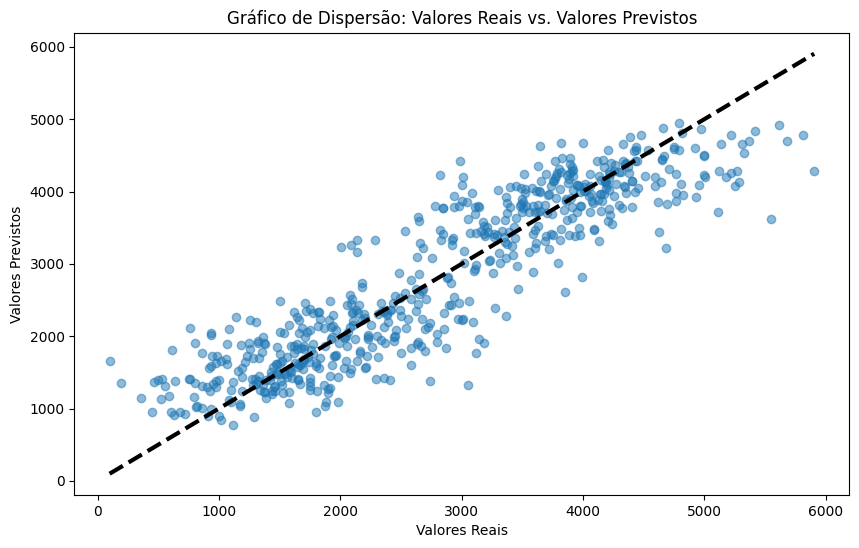

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Criando o gráfico de dispersão
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_std, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.title('Gráfico de Dispersão: Valores Reais vs. Valores Previstos')
plt.show()


#### Verificando Resíduos

Como adicional, é interessante a análise de resíduos para ver o comportamento do modelo na previsão.

- No gráfico abaixo, os resíduos estão espalhados aleatoriamente em torno da linha vermelha, e isso é bom pois, indica que não há padrões claros nos erros.
- Ou seja, está capturando bem a variabilidade dos dados. A relação entre as variáveis independentes e a variável dependente.


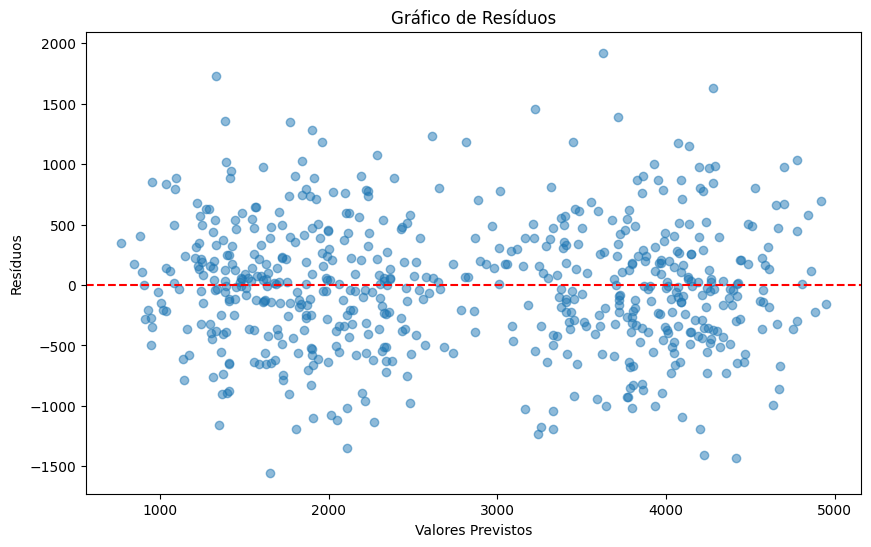

In [15]:
# Calculando os resíduos
residuos = y_test - y_pred_std

# Criando o gráfico de resíduos
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_std, residuos, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valores Previstos')
plt.ylabel('Resíduos')
plt.title('Gráfico de Resíduos')
plt.show()


#### Aplicando p-value em Regressão Linear

- Medida que facilita o entendimento se os resultados são siginificativos. Muito utilizado em testes de hipótese.
- Auxilia em saber se, o modelo funciona bem ou não, de acordo com a diferença dos dados previstos vs os dados reais.

In [ ]:
import statsmodels.api as sm

# Adiciona uma coluna de interceptação à matriz de recursos
x_train_with_const = sm.add_constant(x_train_std_scaled)  # Adiciona um intercepto
model_std = sm.OLS(y_train, x_train_with_const)
results = model_std.fit()

# Resumo dos resultados
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               encargos   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     1474.
Date:                Fri, 02 Aug 2024   Prob (F-statistic):               0.00
Time:                        23:39:00   Log-Likelihood:                -18316.
No. Observations:                2400   AIC:                         3.665e+04
Df Residuals:                    2391   BIC:                         3.670e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2852.3574     10.208    279.420      0.0

#### Aplicando Intervalo de Confiança em Regressão Linear

- Baseado na distribuição amostral, objetiva-se obter uma faixa de valores (intervalo de confiança) com uma determinada probabilidade (nível de confiança) de obter a característica real através de um modelo capaz de modelar determinada variável aleatória.

In [18]:
import statsmodels.api as sm

# Adiciona uma coluna de interceptação à matriz de recursos
x_train_with_const = sm.add_constant(X_train)
model = sm.OLS(y_train, x_train_with_const)
results = model.fit()

# Resumo dos resultados com intervalos de confiança
print(results.summary())

# Intervalos de confiança para os coeficientes
conf_int = results.conf_int()
print(conf_int)

                            OLS Regression Results                            
Dep. Variable:               encargos   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     1474.
Date:                Mon, 05 Aug 2024   Prob (F-statistic):               0.00
Time:                        21:13:35   Log-Likelihood:                -18316.
No. Observations:                2400   AIC:                         3.665e+04
Df Residuals:                    2391   BIC:                         3.670e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -21.7895     41.325  



---





---



# **Conclusão**

Ao longo deste projeto, utilizamos um conjunto de dados robusto, aplicamos técnicas de pré-processamento e selecionamos algoritmos apropriados para construir um modelo preditivo eficiente.

### Importância da Análise Contextual
É crucial ressaltar que a eficácia de um modelo preditivo não depende apenas da precisão dos algoritmos ou da quantidade de dados disponíveis, mas também da qualidade desses dados, e da compreensão profunda do contexto abordado, da compreensão dos fatores que influenciam os custos médicos, ou de outro cenário que esteja sendo apresentado.

### Lições aprendidas:
- **Qualidade dos Dados:** A qualidade e integridade dos dados são fundamentais. Dados incompletos, inviesados ou sem lógica dentro do contexto, podem comprometer a precisão do modelo.
- **Análise dos dados:** Analisar a distribuição dos Dados, seja através de números ou de gráficos, é importante para saber como os dados estão dividos, tipos dos dados, se existem dados faltantes, correlação entre variáveis.
- **Transformação de Dados Categóricos:** Analisar o contexto e o tipo dos dados é importante para aplicar as técnicas corretas.
- **Pré-processamento dos Dados:** Separar os dados de treino e teste corretamente é crucial para ser possível ensinar o modelo a prever a variável correta dentro do contexto.
- **Padronização dos Dados:** Padronizar ou normalizar os dados é um processo inegável em alguns casos.
- **Testes e análise de resultados:** Por fim, testar o modelo com diferentes algoritmos e analisar esses resultados, comparar os resultados e escolher o que melhor atuou dentro do cenário.